<a href="https://colab.research.google.com/github/raymondkim777/JobListingDataAnalysis/blob/main/Data_Analysis_LR_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Development Period: 12/8/2024 ~ 12/30/2023

#Prep

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading & Installing Kaggle

In [39]:
'''
!pip install kaggle
from google.colab import files
files.upload()
'''

'\n!pip install kaggle\nfrom google.colab import files\nfiles.upload()\n'

In [40]:
'''
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Work/Projects/Data_Analysis/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle'''

'\n!mkdir -p ~/.kaggle\n!cp /content/drive/MyDrive/Work/Projects/Data_Analysis/kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!ls ~/.kaggle'

In [41]:
# !kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

In [42]:
# !ls
# !unzip  real-or-fake-fake-jobposting-prediction.zip

#Data Manipulation

Creating DataFrame sampling 1400 job listings (true/false)

In [43]:
import pandas as pd

file = "./drive/MyDrive/Work/Projects/Data_Analysis/fake_job_postings.csv"
df = pd.read_csv(file)
# df.info()

# print(pd.isna(df))
df.fillna(0, inplace=True)
# print(pd.isna(df))
# df.corr()
# df.describe()
col = df.columns
col

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [44]:
df2 = df.loc[:, [col[1], col[5], col[6], col[7], col[17]]]
df2 = df2.drop(df2.loc[df2.loc[:, 'requirements'] == 0].index, axis='index')
df2 = df2.drop(df2.loc[df2.loc[:, 'requirements'] == 0].index, axis='index')
df2 = df2.loc[df2.loc[:, 'description'].str.strip().str.len() > 0]

df2['profile_yn'] = df2.loc[:, 'company_profile'].apply(lambda x: 1 if x != 0 else 0)
col2 = df2.columns
df2 = df2.loc[:, [col2[0], col2[2], col2[3], col2[4], col2[5]]]

df_t = df2.loc[df2.loc[:, col2[-2]] == 0]
df_f = df2.loc[df2.loc[:, col2[-2]] == 1]

df_t = df_t.sample(n=700, replace=False)
df_f = df_f.sample(n=700, replace=False)

sample_df = pd.concat([df_t, df_f], ignore_index=True)
sample_df

,title,description,requirements,fraudulent,profile_yn
0,Senior Luxury Beauty Salesperson,PURPOSEResponsible for selling skincare produc...,Minimum 2 years experience as a Beauty Consult...,0,1
1,English Teacher Abroad,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,0,1
2,"Director of ASIC Engineering, SSD's",What our client needs…An outstanding engineeri...,Excellent proven leadership and people manag...,0,1
3,Hiring 8-10 Reps by Monday- Customer Service/S...,LEI is an industry leader in Home Improvements...,Required Skills:• Candidate must be comfortabl...,0,1
4,Customer Service Associate,The Customer Service Associate will be based i...,Preferred Qualifications:Keyboarding and windo...,0,1
...,...,...,...,...,...
1395,Customer Service Representative,SUMMARYResponsible for acting as a liaison bet...,Degree preferred but not required.Recent colle...,1,0
1396,Home Based Payroll Data Entry Clerk Position -...,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,1,0
1397,Remote Admin Clerk,We are seeking individuals to be connected wit...,Home Office SuppliesComputer with internet acc...,1,0
1398,Daily Money Team Representative,Looking for customer service reps who want to ...,Must be articulate and able to communicate ove...,1,1


Opening stopword file

In [45]:
#!pip install nltk
import nltk
nltk.download('wordnet')

!wget https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords_list = content.split(",")
finally:
    gist_file.close()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


--2024-01-14 01:42:59--  https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6271 (6.1K) [text/plain]
Saving to: ‘gist_stopwords.txt.3’

gist_stopwords.txt. 100%[===================>]   6.12K  --.-KB/s    in 0s      

2024-01-14 01:42:59 (57.8 MB/s) - ‘gist_stopwords.txt.3’ saved [6271/6271]



Removing stopwords & nonsensical words, saving remaining words into list

In [46]:
from nltk.corpus import wordnet

cols = ['title', 'description', 'requirements']

def check_word(word):
  return len(wordnet.synsets(word)) > 0

def remove_non_alpha(word, word_list):
  new_word = word
  for i in range(len(word)):
    if not word[i].isalpha():
      new_word = word[:i]
      rest = word[i + 1:]
      if rest != "":
        word_list.append(rest)
      break
  if check_word(new_word):
    return new_word
  return None

def remove_stop(word_list):
  i = 0
  while i < len(word_list):
    word_list[i] = remove_non_alpha(word_list[i], word_list)
    if word_list[i] is None or word_list[i] == "" or word_list[i] in stopwords_list:
      del word_list[i]
    else:
      i += 1

for idx, r in sample_df.iterrows():
  for c in cols:
    word_list = r[c].lower().split()
    remove_stop(word_list)
    sample_df.at[idx, c] = word_list

sample_df

,title,description,requirements,fraudulent,profile_yn
0,"[senior, luxury, beauty, salesperson]","[selling, skincare, products, range, deliverin...","[minimum, years, experience, beauty, years, ex...",0,1
1,"[english, teacher, abroad]","[play, kids, paid, love, travel, jobs, asia, m...","[university, degree, required, teaching, exper...",0,1
2,"[director, engineering]","[client, outstanding, engineering, leader, dri...","[excellent, proven, leadership, people, manage...",0,1
3,"[hiring, reps, monday, customer, service, sales]","[lei, industry, leader, improvements, customer...","[required, skills, candidate, comfortable, mee...",0,1
4,"[customer, service, associate]","[customer, service, associate, based, york, ca...","[preferred, qualifications, windows, environme...",0,1
...,...,...,...,...,...
1395,"[customer, service, representative]","[acting, liaison, customers, companies, assist...","[degree, preferred, required, college, grads, ...",1,0
1396,"[based, payroll, data, entry, clerk, position,...","[marketing, staffing, firm, serving, companies...","[access, internet, participate, computer, inte...",1,0
1397,"[remote, clerk]","[seeking, individuals, connected, companies, h...","[office, internet, work, area, work, independe...",1,0
1398,"[daily, money, team, representative]","[customer, service, reps, work, dollars, day, ...","[articulate, communicate, phone, customer, ser...",1,1


Calculating tf-idf (separately for each column)

In [47]:
cols = ['description', 'requirements']
tfreq_list = {c: [dict() for i in range(1400)] for c in cols}
dfreq = {c: dict() for c in cols}

def update_freq(word: str, freq: dict):
  if word in freq.keys():
    freq[word] += 1
  else:
    freq[word] = 1

def run_freq(tfreq_list: list, dfreq: dict, col: str):
  for idx, r in sample_df.iterrows():
    for word in r[col]:
      update_freq(word, tfreq_list[idx])
      update_freq(word, dfreq)

for c in cols:
  run_freq(tfreq_list[c], dfreq[c], c)
  dfreq[c] = dict(sorted(dfreq[c].items(), key=lambda x:x[1], reverse=True))

In [48]:
import math

N = 1400
tf_idf = {c: [dict() for i in range(1400)] for c in cols}

def calc_tf_idf(col: str):
  for i in range(1400):
    for word in tfreq_list[col][i]:
      tf = tfreq_list[col][i][word]
      df = dfreq[col][word]
      idf = math.log(N / (1 + df))
      tf_idf[col][i][word] = tf * idf
    tf_idf[col][i] = dict(sorted(tf_idf[col][i].items(), key=lambda x:x[1], reverse=True))

for c in cols:
  calc_tf_idf(c)

for i in range(1400):
  for c in cols:
    if len(tf_idf[c][i]) == 0:
      print(f"{i} ", end="")


163 210 268 400 462 709 709 729 1139 1221 1259 1343 

(Printing average number of words in each column)

In [49]:
key_num = [
    {c: [] for c in cols},
    {c: [] for c in cols}
]

for idx, r in sample_df.iterrows():
  for c in cols:
    if len(tf_idf[c][idx]) != 0:
      key_num[r['profile_yn']][c].append(len(tf_idf[c][idx]))

for i in range(2):
  for c in cols:
    key_num[i][c] = sum(key_num[i][c]) / len(key_num[i][c])

print(key_num)

[{'description': 59.57866184448463, 'requirements': 31.394927536231883}, {'description': 72.37440758293839, 'requirements': 43.02502979737783}]


Selecting 5 keywords with highest tf-idf value for each cell

In [50]:
cols = ['description', 'requirements']
keyword_cnt = 5

def add_keywords(kw_cnt: int, col: str):
  col_name = f'{col[:3]}_keywords'
  sample_df[col_name] = None
  for i in range(1400):
    keywords = []
    for j in range(kw_cnt):
      if len(tf_idf[col][i].keys()) <= j:
        break
      keywords.append(list(tf_idf[col][i].keys())[j])
    sample_df.at[i, col_name] = keywords

for c in cols:
  add_keywords(keyword_cnt, c)

sample_df

,title,description,requirements,fraudulent,profile_yn,des_keywords,req_keywords
0,"[senior, luxury, beauty, salesperson]","[selling, skincare, products, range, deliverin...","[minimum, years, experience, beauty, years, ex...",0,1,"[burberry, beauty, store, aware, merchandise]","[luxury, beauty, combined, advantageous, therapy]"
1,"[english, teacher, abroad]","[play, kids, paid, love, travel, jobs, asia, m...","[university, degree, required, teaching, exper...",0,1,"[db, airfare, furnished, kids, housing]","[passport, holders, teaching, university, pref..."
2,"[director, engineering]","[client, outstanding, engineering, leader, dri...","[excellent, proven, leadership, people, manage...",0,1,"[incremental, methodology, foster, outstanding...","[leadership, host, directing, functionally, sas]"
3,"[hiring, reps, monday, customer, service, sales]","[lei, industry, leader, improvements, customer...","[required, skills, candidate, comfortable, mee...",0,1,"[replace, lei, reps, homeowners, rapport]","[learned, retain, correctly, directed, school]"
4,"[customer, service, associate]","[customer, service, associate, based, york, ca...","[preferred, qualifications, windows, environme...",0,1,"[mail, files, purges, folding, inserting]","[posting, individually, document, running, scr..."
...,...,...,...,...,...,...,...
1395,"[customer, service, representative]","[acting, liaison, customers, companies, assist...","[degree, preferred, required, college, grads, ...",1,0,"[cancel, orders, complaints, questions, warmly]","[freight, grads, dispatch, logistics, air]"
1396,"[based, payroll, data, entry, clerk, position,...","[marketing, staffing, firm, serving, companies...","[access, internet, participate, computer, inte...",1,0,"[seekers, equally, light, remotely, temporary]","[access, internet, participate, address, typing]"
1397,"[remote, clerk]","[seeking, individuals, connected, companies, h...","[office, internet, work, area, work, independe...",1,0,"[legitimate, figure, connected, guarantee, wages]","[guidance, area, independently, internet, job]"
1398,"[daily, money, team, representative]","[customer, service, reps, work, dollars, day, ...","[articulate, communicate, phone, customer, ser...",1,1,"[money, fcc, dollars, reps, ads]","[articulate, communicate, phone, service, cust..."


Loading vector space model for comparing word similarity

In [51]:
from gensim.models import KeyedVectors
import gensim.downloader as api


model_path = "/content/drive/MyDrive/Work/Projects/Data_Analysis/"

# model = api.load("word2vec-google-news-300")
# model.save(model_path + 'word2vvec-google-new-300.model')

In [52]:
model = KeyedVectors.load(model_path + 'word2vvec-google-new-300.model')
sim_score = model.similarity("you", "suck")
print(f"score : {sim_score}")

score : 0.3054656982421875


Calculating ~25 similarity values for 5 keywords each in two columns.
Emphasizes similarity values over 0.25 and lessens values below 0.25.
Yields final sim score & saves it in dataframe.
Process is repeated for column pairs (title/desc), (desc/req).

In [53]:
import numpy as np

cols = [
    'title',
    'des_keywords',
    'req_keywords',
    'rel_sim_score1',
    'rel_sim_score2'
]

sample_df[cols[3]] = None
sample_df[cols[4]] = None

sim_standard = 0.25
rel_sim_score1 = 0
rel_sim_score2 = 0

for idx, r in sample_df.iterrows():
  rel_sim_scores1 = []
  rel_sim_scores2 = []

  for word2 in r[cols[1]]:
    for word1 in r[cols[0]]:
      try:
        rel_sim_score1 = model.similarity(word1, word2)
        rel_sim_scores1.append((word1 != word2) * (rel_sim_score1 / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores1.append(0)
    for word3 in r[cols[2]]:
      try:
        rel_sim_score2 = model.similarity(word2, word3)
        rel_sim_scores2.append((word2 != word3) * (rel_sim_score2 / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores2.append(0)

  if len(rel_sim_scores1) == 0:
    rel_sim_scores1.append(0)
  if len(rel_sim_scores2) == 0:
    rel_sim_scores2.append(0)

  sample_df.at[idx, cols[3]] = np.sqrt(sum(rel_sim_scores1)) / len(rel_sim_scores1)
  sample_df.at[idx, cols[4]] = np.sqrt(sum(rel_sim_scores2)) / len(rel_sim_scores2)

sample_df

,title,description,requirements,fraudulent,profile_yn,des_keywords,req_keywords,rel_sim_score1,rel_sim_score2
0,"[senior, luxury, beauty, salesperson]","[selling, skincare, products, range, deliverin...","[minimum, years, experience, beauty, years, ex...",0,1,"[burberry, beauty, store, aware, merchandise]","[luxury, beauty, combined, advantageous, therapy]",0.147032,0.092349
1,"[english, teacher, abroad]","[play, kids, paid, love, travel, jobs, asia, m...","[university, degree, required, teaching, exper...",0,1,"[db, airfare, furnished, kids, housing]","[passport, holders, teaching, university, pref...",0.133996,0.09249
2,"[director, engineering]","[client, outstanding, engineering, leader, dri...","[excellent, proven, leadership, people, manage...",0,1,"[incremental, methodology, foster, outstanding...","[leadership, host, directing, functionally, sas]",0.115416,0.087957
3,"[hiring, reps, monday, customer, service, sales]","[lei, industry, leader, improvements, customer...","[required, skills, candidate, comfortable, mee...",0,1,"[replace, lei, reps, homeowners, rapport]","[learned, retain, correctly, directed, school]",0.087762,0.086921
4,"[customer, service, associate]","[customer, service, associate, based, york, ca...","[preferred, qualifications, windows, environme...",0,1,"[mail, files, purges, folding, inserting]","[posting, individually, document, running, scr...",0.126263,0.117337
...,...,...,...,...,...,...,...,...,...
1395,"[customer, service, representative]","[acting, liaison, customers, companies, assist...","[degree, preferred, required, college, grads, ...",1,0,"[cancel, orders, complaints, questions, warmly]","[freight, grads, dispatch, logistics, air]",0.119495,0.076042
1396,"[based, payroll, data, entry, clerk, position,...","[marketing, staffing, firm, serving, companies...","[access, internet, participate, computer, inte...",1,0,"[seekers, equally, light, remotely, temporary]","[access, internet, participate, address, typing]",0.060669,0.086963
1397,"[remote, clerk]","[seeking, individuals, connected, companies, h...","[office, internet, work, area, work, independe...",1,0,"[legitimate, figure, connected, guarantee, wages]","[guidance, area, independently, internet, job]",0.123449,0.114312
1398,"[daily, money, team, representative]","[customer, service, reps, work, dollars, day, ...","[articulate, communicate, phone, customer, ser...",1,1,"[money, fcc, dollars, reps, ads]","[articulate, communicate, phone, service, cust...",0.158141,0.085776


Printing final dataframe with extracted similarity quantities.
Here, rel_sim_score1 is for (title/desc), rel_sim_score2 is for (desc/req).

In [54]:
col = sample_df.columns
final_df = sample_df[[col[4], col[7], col[8], col[3]]]
final_df

,profile_yn,rel_sim_score1,rel_sim_score2,fraudulent
0,1,0.147032,0.092349,0
1,1,0.133996,0.09249,0
2,1,0.115416,0.087957,0
3,1,0.087762,0.086921,0
4,1,0.126263,0.117337,0
...,...,...,...,...
1395,0,0.119495,0.076042,1
1396,0,0.060669,0.086963,1
1397,0,0.123449,0.114312,1
1398,1,0.158141,0.085776,1


#Logistic Regression

##Graph 1 (profile_yn & rel_sim_score2)

Logistic Regression model, with quantities from profile_yn and rel_sim_score2.

In [55]:
m1_x = final_df.loc[:, ['profile_yn', 'rel_sim_score2']]
m1_y = final_df.loc[:, 'fraudulent']
print(m1_x)
print(m1_y)

      profile_yn rel_sim_score2
0              1       0.092349
1              1        0.09249
2              1       0.087957
3              1       0.086921
4              1       0.117337
...          ...            ...
1395           0       0.076042
1396           0       0.086963
1397           0       0.114312
1398           1       0.085776
1399           0       0.072622

[1400 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(m1_x, m1_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [57]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.6964285714285714


Displaying logistic regression model results alongside training/test data in scatterplot with matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-58-443a7e655034>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


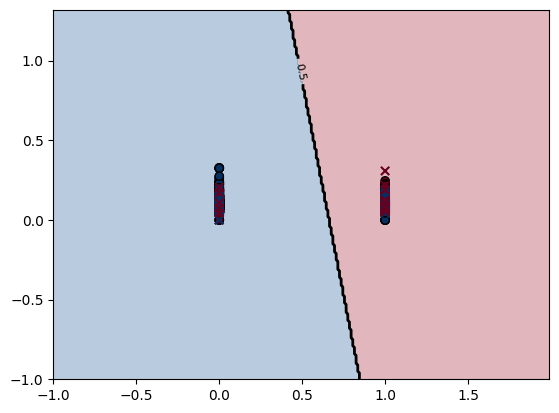

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)

plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Summary of model: only factor in data being split is profile_yn, with rel_sim_score1 having no effect. Usage of profile_yn for logistic regression is seemingly unfit. Better usage for Decision Tree (below).

##Graph 2 (rel_sim_score1 & rel_sim_score2)

Logistic Regression model, with quantities from rel_sim_score1 and rel_sim_score2.

In [59]:
m2_x = final_df.loc[:, ['rel_sim_score1', 'rel_sim_score2']]
m2_y = final_df.loc[:, 'fraudulent']
print(m2_x)
print(m2_y)

     rel_sim_score1 rel_sim_score2
0          0.147032       0.092349
1          0.133996        0.09249
2          0.115416       0.087957
3          0.087762       0.086921
4          0.126263       0.117337
...             ...            ...
1395       0.119495       0.076042
1396       0.060669       0.086963
1397       0.123449       0.114312
1398       0.158141       0.085776
1399       0.089188       0.072622

[1400 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(m2_x, m2_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [61]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.4785714285714286


Displaying logistic regression model results alongside training/test data in scatterplot with matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-62-443a7e655034>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


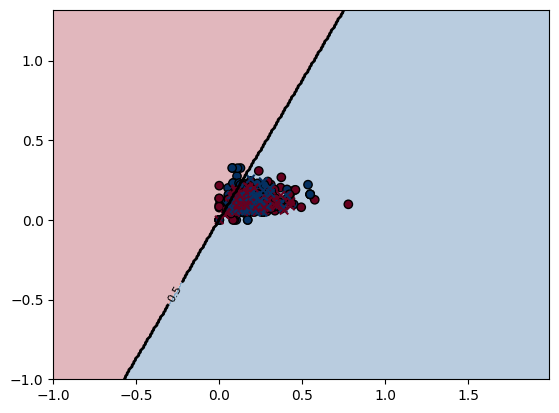

In [62]:
import numpy as np
import matplotlib.pyplot as plt

x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)

plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()


Summary of model: Inconclusive division. Perhaps extracted quantities weren't as meaningful. Different data manipulation method required.

#Decision Tree

Importing Decision Tree Model

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

x_col = ['profile_yn', 'rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

dt1_x = final_df.loc[:, x_col]
dt1_y = final_df.loc[:, y_col]

print(dt1_x)
print(dt1_y)

      profile_yn rel_sim_score1 rel_sim_score2
0              1       0.147032       0.092349
1              1       0.133996        0.09249
2              1       0.115416       0.087957
3              1       0.087762       0.086921
4              1       0.126263       0.117337
...          ...            ...            ...
1395           0       0.119495       0.076042
1396           0       0.060669       0.086963
1397           0       0.123449       0.114312
1398           1       0.158141       0.085776
1399           0       0.089188       0.072622

[1400 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Decision Tree Model

In [64]:
x_train, x_test, y_train, y_test = train_test_split(dt1_x, dt1_y, test_size=0.2)
dt1_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt1_model.fit(x_train, y_train)

print(f"acc: {accuracy_score(y_test, dt1_model.predict(x_test))}")
print(f"{classification_report(y_test, dt1_model.predict(x_test))}")

acc: 0.7
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       133
           1       0.77      0.61      0.68       147

    accuracy                           0.70       280
   macro avg       0.71      0.70      0.70       280
weighted avg       0.71      0.70      0.70       280



[Text(0.5, 0.875, 'profile_yn <= 0.5\ngini = 0.5\nsamples = 1120\nvalue = [567, 553]\nclass = true'),
 Text(0.25, 0.625, 'rel_sim_score2 <= 0.046\ngini = 0.336\nsamples = 440\nvalue = [94, 346]\nclass = false'),
 Text(0.125, 0.375, 'rel_sim_score1 <= 0.089\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = true'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = true'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = true'),
 Text(0.375, 0.375, 'rel_sim_score1 <= 0.157\ngini = 0.327\nsamples = 432\nvalue = [89, 343]\nclass = false'),
 Text(0.3125, 0.125, 'gini = 0.284\nsamples = 292\nvalue = [50, 242]\nclass = false'),
 Text(0.4375, 0.125, 'gini = 0.402\nsamples = 140\nvalue = [39, 101]\nclass = false'),
 Text(0.75, 0.625, 'rel_sim_score1 <= 0.108\ngini = 0.423\nsamples = 680\nvalue = [473, 207]\nclass = true'),
 Text(0.625, 0.375, 'rel_sim_score2 <= 0.053\ngini = 0.252\nsamples = 189\nvalue = [161, 28]\nclass = true'),
 Text(0.5625, 0.125,

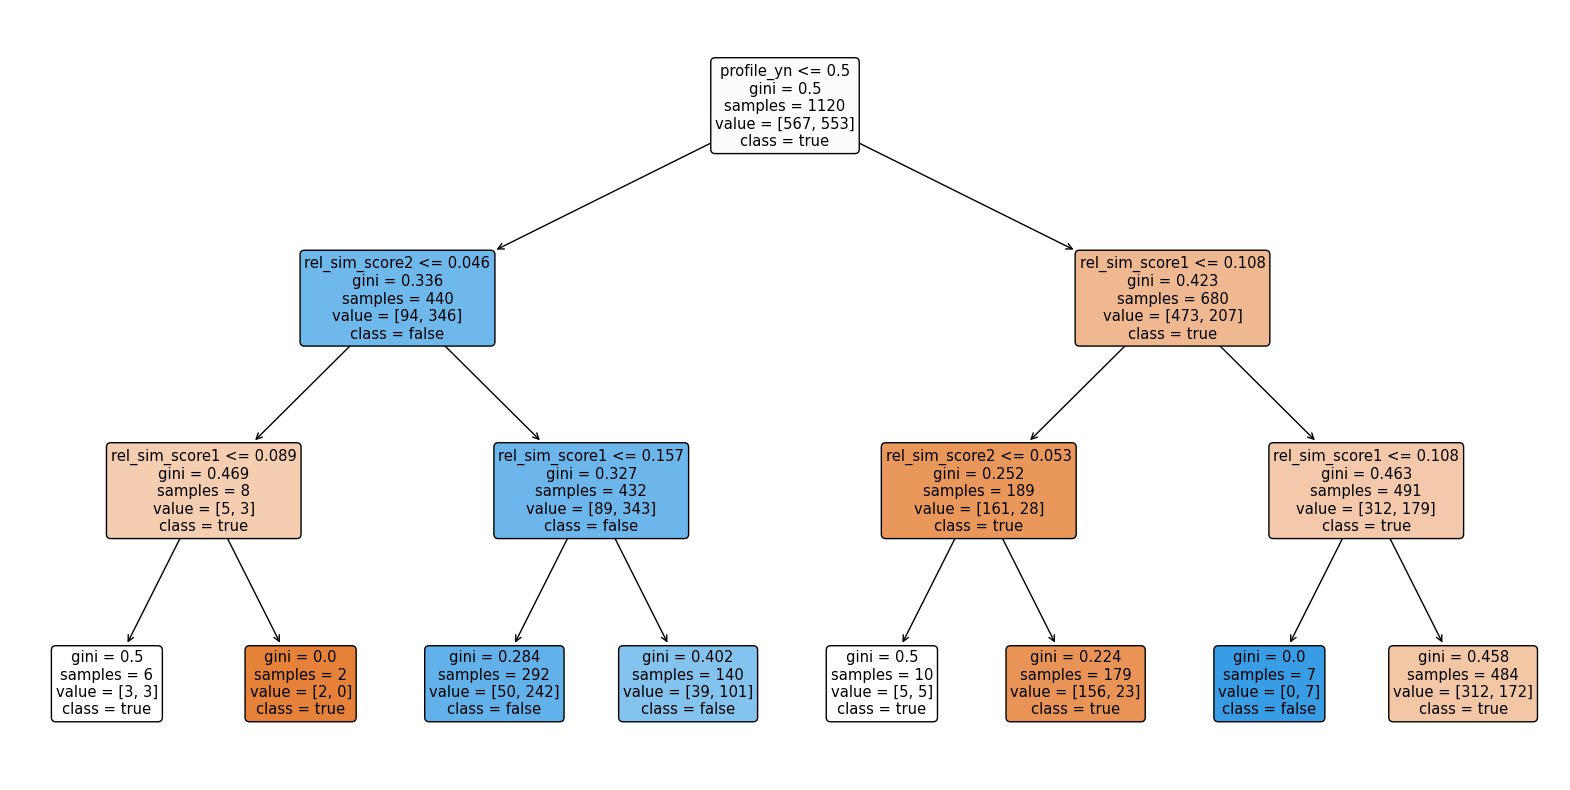

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt1_model, filled=True, feature_names=x_col, class_names=['true', 'false'], rounded=True)

Model results: Decision Tree classification is arguably pretty good.
However main factor for classification is once again profile_yn.
Idea to initially split data with profile_yn, then run logistic regression afterwards (shown below).

# Decision + Logistic Regression

(Rationale explained above)

In [66]:
final_df_py = final_df.loc[final_df.loc[:, 'profile_yn'] == 1]
final_df_pn = final_df.loc[final_df.loc[:, 'profile_yn'] == 0]

##Profile: Y

In [67]:
x_col = ['rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

py_x = final_df_py.loc[:, x_col]
py_y = final_df_py.loc[:, y_col]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(py_x, py_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [69]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.6982248520710059


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-70-31ae8ff92f47>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


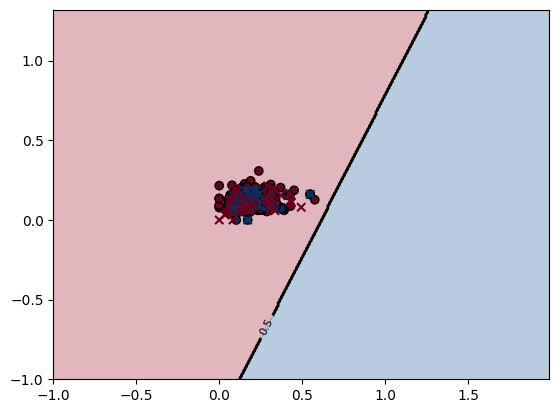

In [70]:
x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)


plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Model results: inconclusive.

##Profile: N

In [71]:
x_col = ['rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

py_x = final_df_pn.loc[:, x_col]
py_y = final_df_pn.loc[:, y_col]

In [72]:
x_train, x_test, y_train, y_test = train_test_split(py_x, py_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [73]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.7589285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-31ae8ff92f47>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


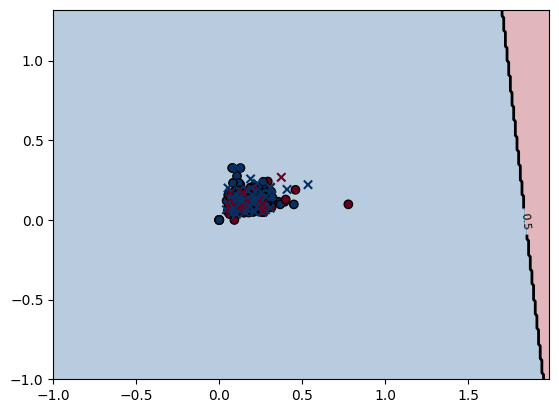

In [74]:
x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)


plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Model results: inconclusive

i want to kill myself